1.  To predict the price of the used car - Regression Problem
2.  ML Model - Linear & Lasso Model (Supervised ML)
2.  Work Flow

    *   Collect Car Price Data - Kaggle Dataset
    *   Data Pre-Processing
    *   Train-Test Split
    *   Machine Learning Training - Linear & Lasso Model (Supervised ML)

Import the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection & Pre-Processing

In [ ]:
car_data = pd.read_csv('/content/car data.csv')

In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car_data.shape

(4340, 8)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
car_data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
# checking the distribution of categorical data

print(car_data['fuel'].value_counts())
print(car_data['seller_type'].value_counts())
print(car_data['transmission'].value_counts())
print(car_data['owner'].value_counts())

fuel
0    2153
1    2123
2      40
3      23
4       1
Name: count, dtype: int64
seller_type
0    3244
1     994
2     102
Name: count, dtype: int64
transmission
0    3892
1     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Label Encoding - Categorical Data

In [ ]:
# label encoding 'fuel' columns
car_data.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace = True)

# label encoding 'seller_type' columns
car_data.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace = True)

# label encoding 'transmission' columns
car_data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

# label encoding 'owner' columns
car_data.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)

<ipython-input-17-8e87dbfa4fe9>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)


In [ ]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [ ]:
X = car_data.drop(['name', 'selling_price'], axis=1)
Y = car_data['selling_price']

In [ ]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [ ]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Train-Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 6) (3472, 6) (868, 6)


Machine Learning Training - Linear Regression Model

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation - Linear Regression Model

In [ ]:
# accuracy on training data

train_data_prediction = lin_reg_model.predict(X_train)
train_data_accuracy = metrics.r2_score(Y_train, train_data_prediction)
print('The accuracy on training data = ', train_data_accuracy)

The accuracy on training data =  0.43922410637048914


In [ ]:
# accuracy on test data

test_data_prediction = lin_reg_model.predict(X_test)
test_data_accuracy = metrics.r2_score(Y_test, test_data_prediction)
print('The accuracy on test data = ', test_data_accuracy)

The accuracy on test data =  0.49988298730549385


Visualization - Linear Regression Model

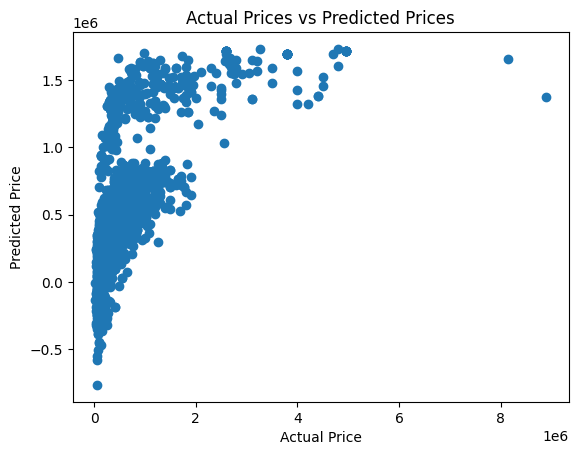

In [ ]:
# training data plot

plt.scatter(Y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

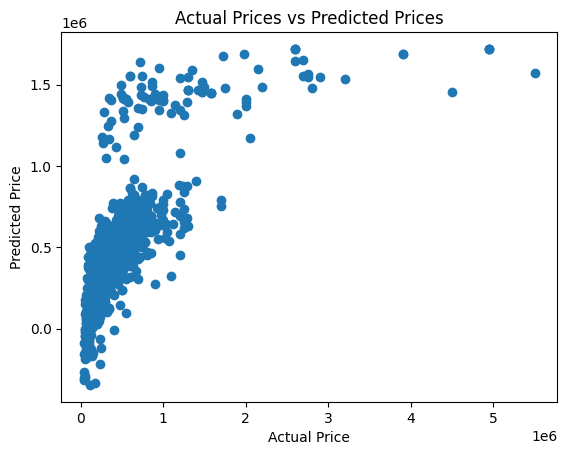

In [ ]:
# test data plot

plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Machine Learning Training - Lasso Regression Model

In [ ]:
lasso_reg_model = Lasso()

In [ ]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation - Lasso Regression Model

In [ ]:
# accuracy on training data

train_data_prediction = lasso_reg_model.predict(X_train)
train_data_accuracy = metrics.r2_score(Y_train, train_data_prediction)
print('The accuracy on training data = ', train_data_accuracy)

The accuracy on training data =  0.4392241063188461


In [ ]:
# accuracy on test data

test_data_prediction = lasso_reg_model.predict(X_test)
test_data_accuracy = metrics.r2_score(Y_test, test_data_prediction)
print('The accuracy on test data = ', test_data_accuracy)

The accuracy on test data =  0.49988271066297707


Visualization - Lasso Regression Model

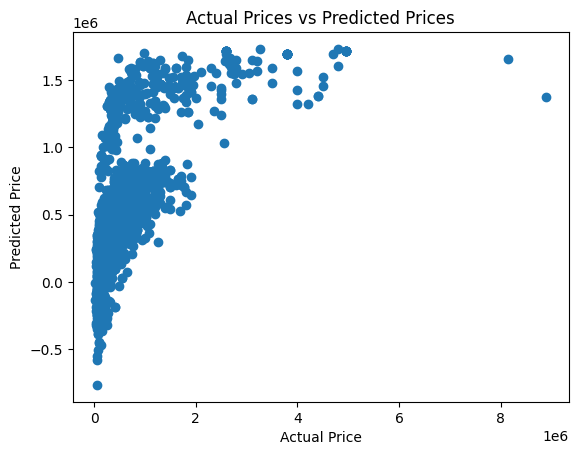

In [ ]:
# training data plot

plt.scatter(Y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

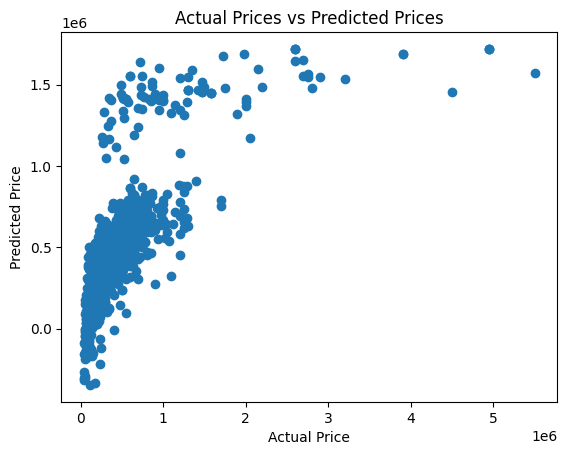

In [ ]:
# test data plot

plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()